Análise de sentimento - many to one. Detetar o tipo de sentimento. Neste dataset, a classificação foi feita manualmente. 

In [1]:
# Load twitter data

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("C:/Users/PTL14736/Documents/DSBA_disco/9. Deep Learning Models/Aula 3/training.1600000.processed.noemoticon.csv", encoding = 'latin', header=None)

In [4]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
# Let's rename columns
df.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
df.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [6]:
# keep only the columns we need 
df = df.drop(['id', 'date', 'query', 'user_id'], axis=1)


In [7]:
# Let's check available labels. Temos 2 classes. 
set(df.sentiment) # IN this case 0 = Negative and 4 = positive

{0, 4}

In [8]:
# Let's map it
label_map = {"0":"Negative", "4":"Positive"}

df["sentiment"] = df.sentiment.apply(lambda x: label_map[str(x)]) #a apply aplica a função a linhas e colunas, por defeito aplica na coluna
df.head()

,sentiment,text
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,is upset that he can't update his Facebook by ...
2,Negative,@Kenichan I dived many times for the ball. Man...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all...."


Text(0.5, 1.0, 'Sentiment Distribution')

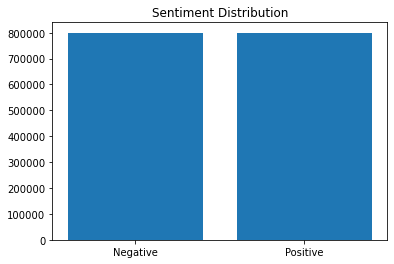

In [9]:
# Let's check distribution
import matplotlib.pyplot as plt
val_count = df.sentiment.value_counts()

plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Distribution")

With this we can see that we have a balanced dataset

# Text processing

In [10]:
# From the data we saw above we need to apply some cleaning steps

# 1. Remove stop words

In [11]:
import nltk
nltk.download("stopwords") # do it at least once

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PTL14736\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
# As seen in the slides 
from nltk.corpus import stopwords
en_stops = set(stopwords.words("english"))

In [13]:
en_stops

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [14]:
len(en_stops)

179

In [15]:
stopwords.words("portuguese")

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja',
 'hajam',
 'hajamos',
 'hão',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houverá',
 'houveram',
 'houvéramos',
 'houverão',
 'houverei',
 'houverem',
 'hou

In [16]:
len(stopwords.words("portuguese"))

207

# 2. Word stemming

In [17]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

# 3. Remove certain words using regex

In [18]:
text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+" #varia de aplicação para aplicação

# 4. Apply preprocessing steps

In [19]:
import re
def preprocess(text):
    # Replacing specific words with regex with ' ' 
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    
    # variable to save the results
    tokens = [] #tokenização
    for token in text.split(): # Iterate over each word, so we need the split command
        if token not in en_stops: # Check if the word exists inside the stopwords list
            tokens.append(ps.stem(token)) #stemming do token 
    return " ".join(tokens)

In [20]:
df.text = df.text.apply(lambda x: preprocess(x)) # This takes a couple minutes to run aprox 5 min

In [21]:
# Let's take a look to some results
df.head()

,sentiment,text
0,Negative,awww bummer shoulda got david carr third day
1,Negative,upset updat facebook text might cri result sch...
2,Negative,dive mani time ball manag save 50 rest go bound
3,Negative,whole bodi feel itchi like fire
4,Negative,behav mad see


# Let's perform some vizualization with WordCloud

In [22]:
!pip install wordcloud

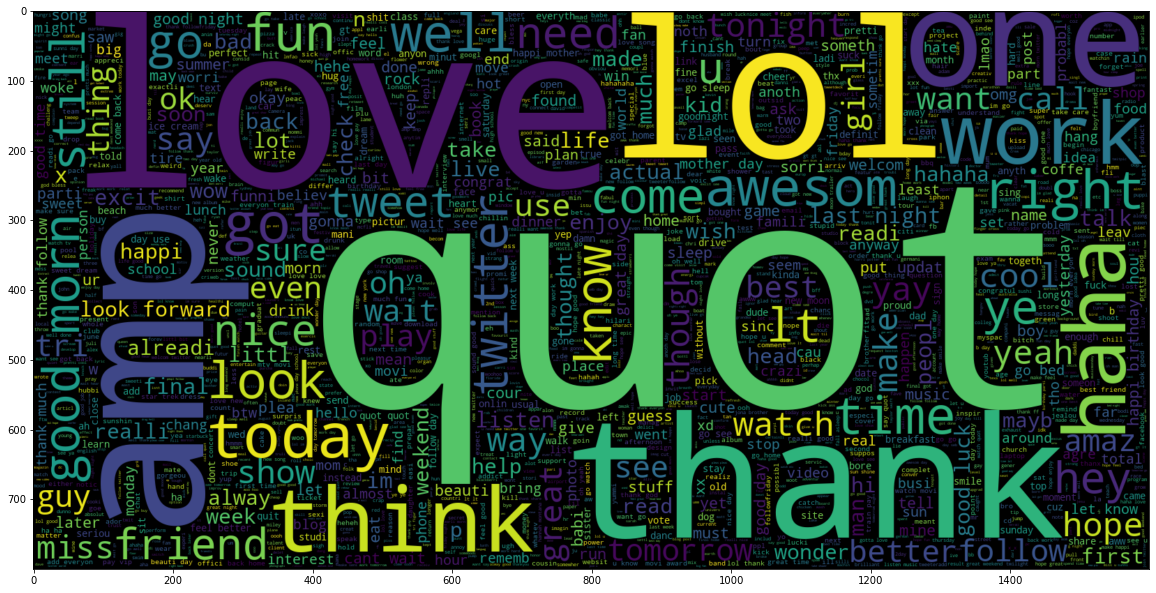

In [23]:
#técnica de visualização muito utilizada com palavras 

from wordcloud import WordCloud  # This takes 2 min to run

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Positive'].text))
plt.imshow(wc , interpolation = 'bilinear')

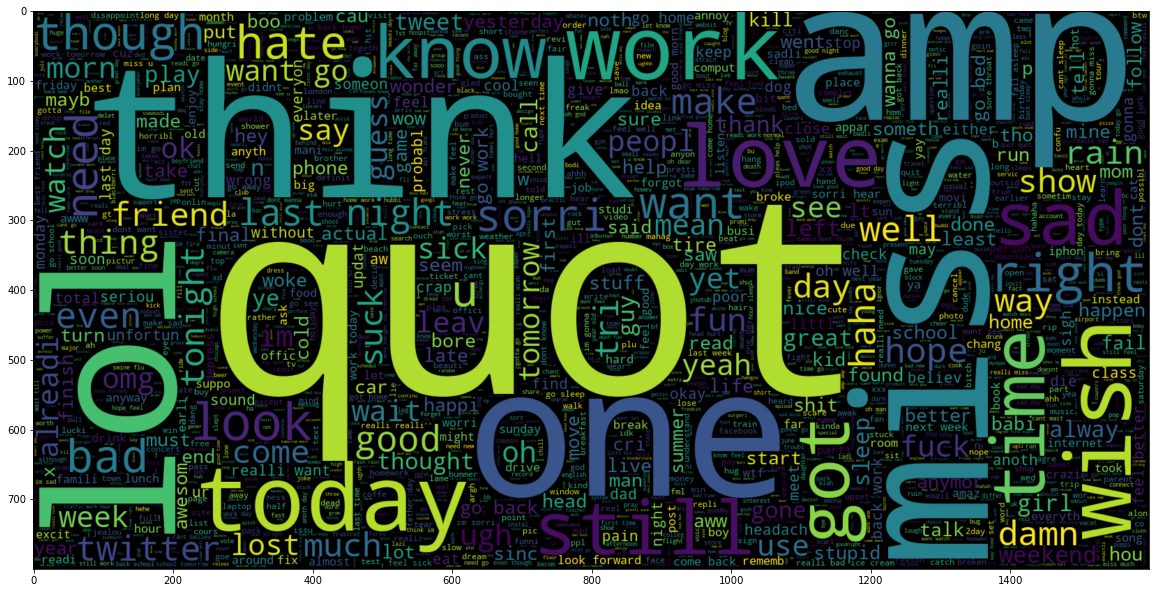

In [24]:
# For negative words # This takes 2 min to run
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Negative'].text))
plt.imshow(wc , interpolation = 'bilinear')

# Let's divide into train test data

In [25]:
from sklearn.model_selection import train_test_split


In [26]:
train_data, test_data = train_test_split(df, test_size=0.2,
                                         random_state=7) # Splits Dataset into Training and Testing set
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 1280000
Test Data size 320000


In [27]:
train_data.head(10)


,sentiment,text
23786,Negative,need friend
182699,Negative,im tri call imposs
476661,Negative,good pace go 3k 13 min miss 5k turn end 10k wa...
1181490,Positive,u gonna show ny soon luv see u live
878773,Positive,hell yea get em tattoo ink free wish parent li...
130866,Negative,yeah need 2 see ur mom call back first remembr...
1235876,Positive,sound like cup tea sign
717314,Negative,tire want sleep wtf
969880,Positive,amaz wish
748698,Negative,thank god wkrn abc affili nashvil back miss so...


# Tokenization

Given a character sequence and a defined document unit, tokenization is the task of chopping it up into pieces, called tokens , perhaps at the same time throwing away certain characters, such as punctuation. The process is called Tokenization.

tokenizer create tokens for every word in the data corpus and map them to a index using dictionary.

word_index contains the index for each word

vocab_size represents the total number of word in the data corpus

In [28]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.text)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 248268


One requirement for text model to work properly is to have the same amount of token in order to ensure the same amount of inputs. For the shorter sentences we pad with zeros. If bigger tey are truncated.
More info here https://www.tensorflow.org/api_docs/python/tf/keras/utils/pad_sequences



In [29]:
from keras.utils import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.text),
                        maxlen = 30)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.text),
                       maxlen = 30)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (1280000, 30)
Testing X Shape: (320000, 30)


# Label Encoding

In [30]:
#se usásemos o método de cima também dava. Agora passamos novamente de negativo/positivo para números 

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(train_data.sentiment.to_list())

y_train = encoder.transform(train_data.sentiment.to_list())
y_test = encoder.transform(test_data.sentiment.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (1280000, 1)
y_test shape: (320000, 1)


# Word to vec

In [31]:
# Since we cannot use actual words in the model, we need to convert them into words. 
# For  that we are going to use Glove

In [32]:
#!pip install wget 
#!pip install unzip 
#!wget http://nlp.stanford.edu/data/glove.6B.zip
#!unzip glove.6B.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [37]:
import numpy as np

f = f = open("glove.6B.50d.txt", 'r', encoding='utf-8') # 50 dimensions vector
#f = open("C:/Users/PTL14736/Documents/DSBA_disco/9. Deep Learning Models/Aula 3/glove.6B.50d.txt") # 50 dimensions vector

embeddings_index = {}

for line in f:
    values = line.split()
    word = value = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [38]:
len(embeddings_index["the"]) # we confirm that the word 'the' as a 50 dim vector

50

In [39]:
# This creates a matrix with the embbedings for each word in our vocabulary
embedding_matrix = np.zeros((vocab_size, 50))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [40]:
embedding_matrix.shape

(248268, 50)

# Model definition

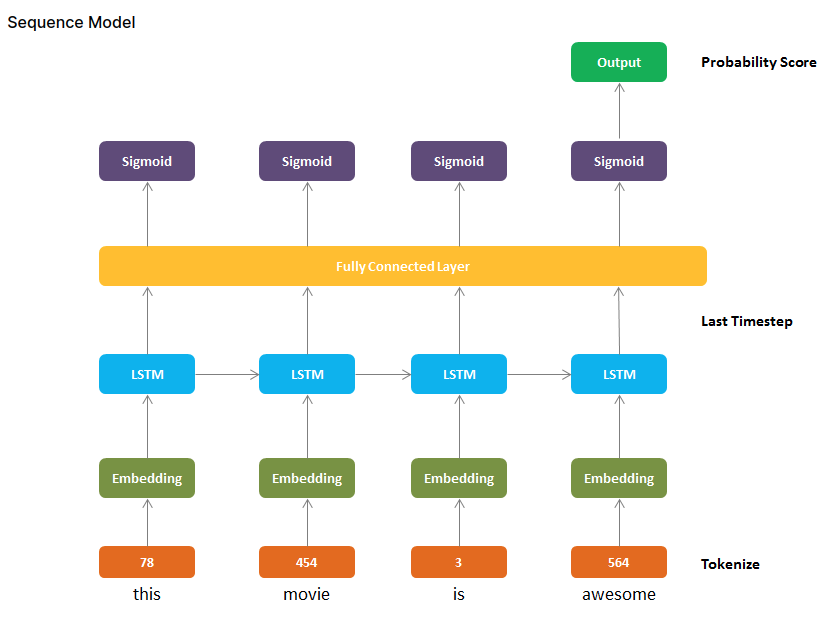

In [41]:
# In this example, we need to provide a special input layer because we are passing ebeddings

In [42]:
import tensorflow as tf
# This layer perform the selection of the embeddings to us
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          50,
                                          weights=[embedding_matrix],
                                          input_length=30,
                                          trainable=False) # This is False because we already have our embeddings no need to create them

In [43]:
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras import Sequential

In [44]:
model = Sequential([
    embedding_layer,
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

In [45]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [46]:
history = model.fit(x_train[:10000], y_train[:10000], batch_size=500, epochs=10, validation_split=0.3)

Epoch 1/10
14/14 [==============================] - 4s 124ms/step - loss: 0.6608 - accuracy: 0.6013 - val_loss: 0.6339 - val_accuracy: 0.6363
Epoch 2/10
14/14 [==============================] - 1s 96ms/step - loss: 0.6227 - accuracy: 0.6454 - val_loss: 0.6273 - val_accuracy: 0.6477
Epoch 3/10
14/14 [==============================] - 1s 100ms/step - loss: 0.6051 - accuracy: 0.6639 - val_loss: 0.6130 - val_accuracy: 0.6677
Epoch 4/10
14/14 [==============================] - 1s 96ms/step - loss: 0.5851 - accuracy: 0.6803 - val_loss: 0.6057 - val_accuracy: 0.6677
Epoch 5/10
14/14 [==============================] - 1s 94ms/step - loss: 0.5668 - accuracy: 0.6963 - val_loss: 0.6107 - val_accuracy: 0.6710
Epoch 6/10
14/14 [==============================] - 1s 94ms/step - loss: 0.5447 - accuracy: 0.7204 - val_loss: 0.6009 - val_accuracy: 0.6723
Epoch 7/10
14/14 [==============================] - 1s 94ms/step - loss: 0.5325 - accuracy: 0.7254 - val_loss: 0.6052 - val_accuracy: 0.6737
Epoch 8/10


In [47]:
# evaluate the model
loss = model.evaluate(x_test[:1000], y_test[:1000])

32/32 [==============================] - 0s 3ms/step - loss: 0.6256 - accuracy: 0.6710


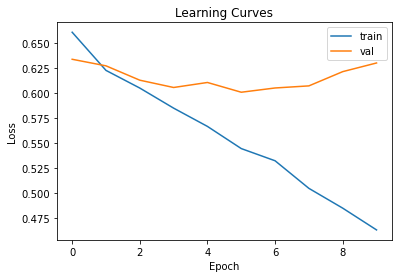

In [48]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history.epoch, history.history["loss"], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 50)            12413400  
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 12,442,905
Trainable params: 29,505
Non-trainable params: 12,413,400
_________________________________________________________________


# Let's try to improve the model by adding 

## 1. Dropout
## 2. Extra LSTM layer
## 3. Extra Dense Layer

In [50]:
embedding_layer.input_dim

248268

In [51]:
from tensorflow.keras.layers import Dropout
model = Sequential([
    embedding_layer,
    LSTM(32, dropout=0.2, recurrent_dropout=0.2, return_sequences=True,),
    LSTM(18),
    Dense(10, activation="relu"),
    Dense(1, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train[:10000], y_train[:10000], batch_size=500, epochs=10, validation_split=0.3)




Epoch 1/10
14/14 [==============================] - 5s 129ms/step - loss: 0.6849 - accuracy: 0.4906 - val_loss: 0.6660 - val_accuracy: 0.4993
Epoch 2/10
14/14 [==============================] - 1s 80ms/step - loss: 0.6533 - accuracy: 0.4906 - val_loss: 0.6398 - val_accuracy: 0.4993
Epoch 3/10
14/14 [==============================] - 1s 79ms/step - loss: 0.6281 - accuracy: 0.4906 - val_loss: 0.6236 - val_accuracy: 0.4993
Epoch 4/10
14/14 [==============================] - 1s 78ms/step - loss: 0.6090 - accuracy: 0.4906 - val_loss: 0.6133 - val_accuracy: 0.4993
Epoch 5/10
14/14 [==============================] - 1s 81ms/step - loss: 0.5945 - accuracy: 0.4906 - val_loss: 0.6009 - val_accuracy: 0.4993
Epoch 6/10
14/14 [==============================] - 1s 82ms/step - loss: 0.5715 - accuracy: 0.4906 - val_loss: 0.6016 - val_accuracy: 0.4993
Epoch 7/10
14/14 [==============================] - 1s 80ms/step - loss: 0.5594 - accuracy: 0.4906 - val_loss: 0.6029 - val_accuracy: 0.4993
Epoch 8/10
1

In [52]:
# evaluate the model
loss = model.evaluate(x_test[:1000], y_test[:1000])

32/32 [==============================] - 1s 5ms/step - loss: 0.6124 - accuracy: 0.4810


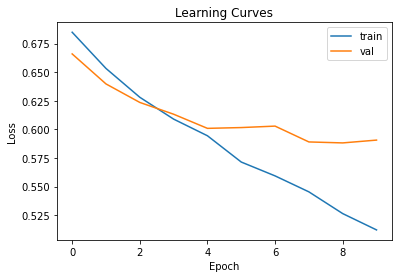

In [53]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history.epoch, history.history["loss"], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()

In [54]:
from tensorflow.keras.layers import Dropout
model = Sequential([
    embedding_layer,
    LSTM(32, dropout=0.2, recurrent_dropout=0.2, return_sequences=True,),
    LSTM(18),
    Dense(10, activation="relu"),
    Dense(1, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train[:15000], y_train[:15000], batch_size=500, epochs=50, validation_split=0.3)



Epoch 1/50
21/21 [==============================] - 6s 110ms/step - loss: 0.6620 - accuracy: 0.4910 - val_loss: 0.6369 - val_accuracy: 0.4998
Epoch 2/50
21/21 [==============================] - 2s 82ms/step - loss: 0.6228 - accuracy: 0.4910 - val_loss: 0.6229 - val_accuracy: 0.4998
Epoch 3/50
21/21 [==============================] - 2s 78ms/step - loss: 0.6062 - accuracy: 0.4910 - val_loss: 0.6051 - val_accuracy: 0.4998
Epoch 4/50
21/21 [==============================] - 2s 78ms/step - loss: 0.5859 - accuracy: 0.4910 - val_loss: 0.5959 - val_accuracy: 0.4998
Epoch 5/50
21/21 [==============================] - 2s 79ms/step - loss: 0.5683 - accuracy: 0.4910 - val_loss: 0.5860 - val_accuracy: 0.4998
Epoch 6/50
21/21 [==============================] - 2s 79ms/step - loss: 0.5539 - accuracy: 0.4910 - val_loss: 0.5994 - val_accuracy: 0.4998
Epoch 7/50
21/21 [==============================] - 2s 81ms/step - loss: 0.5380 - accuracy: 0.4910 - val_loss: 0.5873 - val_accuracy: 0.4998
Epoch 8/50
2

In [55]:
# evaluate the model
loss = model.evaluate(x_test[:1000], y_test[:1000])

32/32 [==============================] - 1s 5ms/step - loss: 0.7294 - accuracy: 0.4810


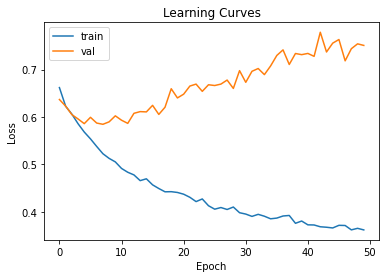

In [56]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history.epoch, history.history["loss"], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()

In [74]:
from tensorflow.keras.layers import Dropout
model = Sequential([
    embedding_layer,
    LSTM(32, dropout=0.2, recurrent_dropout=0.2, return_sequences=True),
    LSTM(18),
    LSTM(6),
    Dense(10, activation="relu"),
    Dense(1, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train[:10000], y_train[:10000], batch_size=500, epochs=10, validation_split=0.3)



ValueError: Input 0 of layer "lstm_53" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 18)